### PCA(Principal Component Analysis) : 주성분 분석
- 차원 축소를 통해 최소 차원의 정보로 원래 차원의 정보를 모사(approximate)하는 방법

In [10]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.decomposition import PCA

##### 1. 2-Level PCA

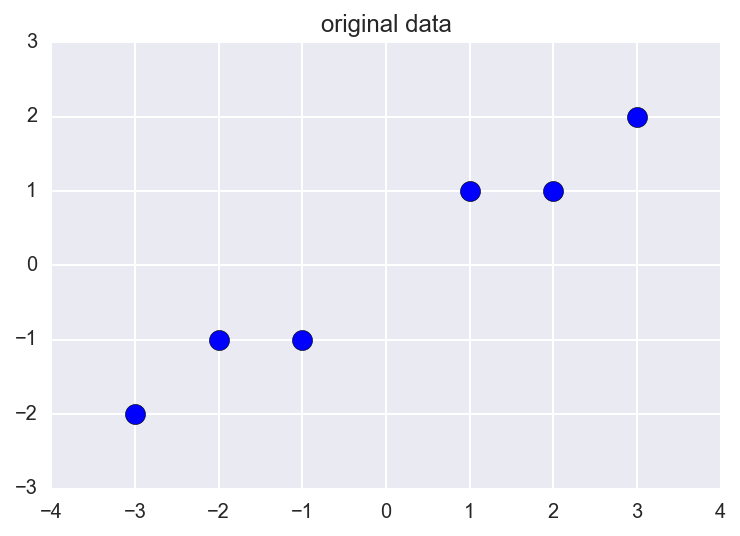

In [21]:
# make 2-Level PCA sample data
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
plt.scatter(X[:,0], X[:,1], s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("original data")
plt.show()

In [23]:
# pca fit transform : moving center coodinate (좌표 중심 이동)
pca = PCA(n_components=2)
Z = pca.fit_transform(X)
print(Z)
w, V = np.linalg.eig(pca.get_covariance())
V.T.dot(X.T).T

[[-1.38340578  0.2935787 ]
 [-2.22189802 -0.25133484]
 [-3.6053038   0.04224385]
 [ 1.38340578 -0.2935787 ]
 [ 2.22189802  0.25133484]
 [ 3.6053038  -0.04224385]]


array([[-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385],
       [ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385]])

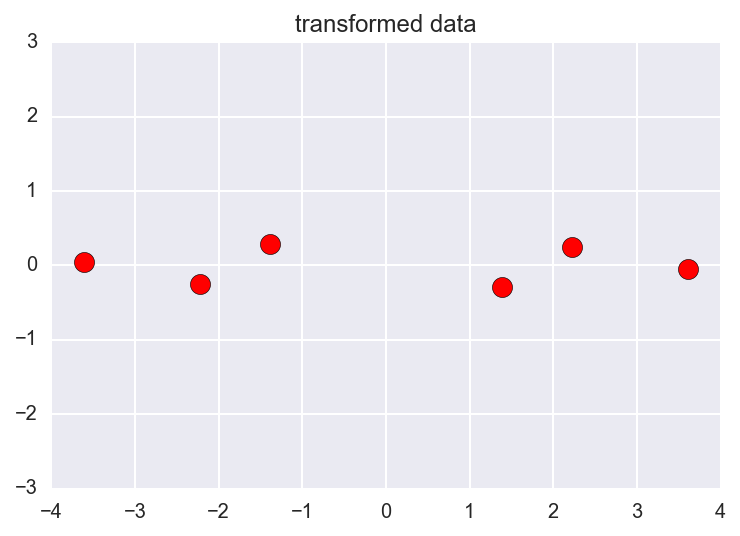

In [24]:
# draw 
plt.scatter(Z[:,0], Z[:,1], c='r', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed data")
plt.show()

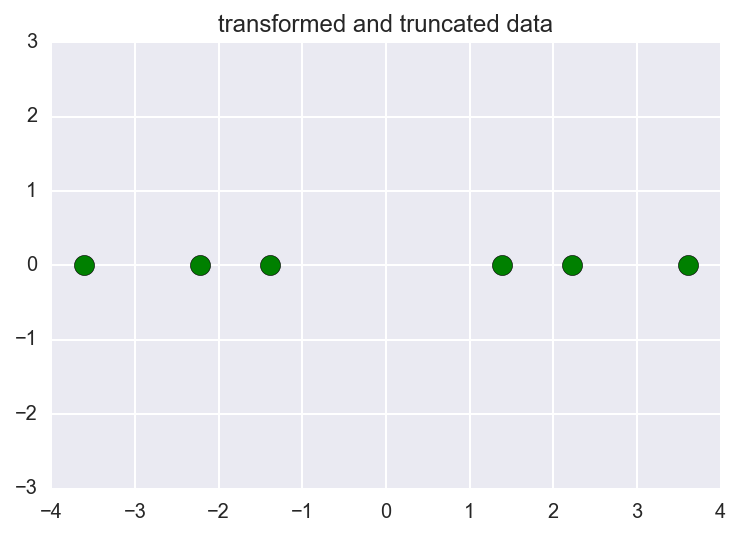

In [25]:
# change y datas to zero & draw
plt.scatter(Z[:,0], np.zeros_like(Z[:,1]), c='g', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed and truncated data")
plt.show()
# you can check only x-value

##### 2. PCA of iris data 

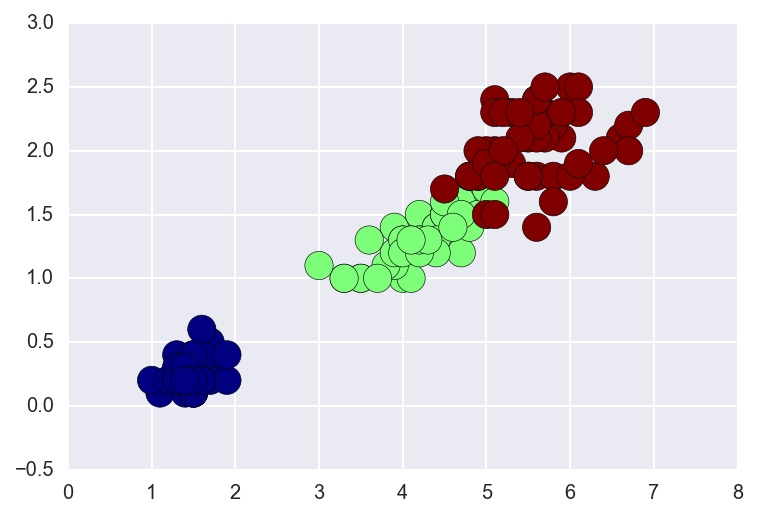

In [26]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,2:]
plt.scatter(X[:, 0], X[:, 1], c=iris.target, s=200, cmap=plt.cm.jet);

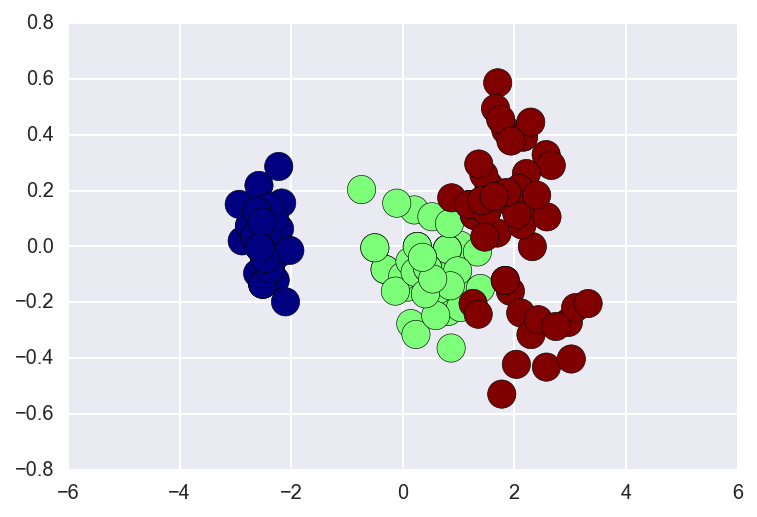

In [32]:
# moving coodinate
X2 = PCA(2).fit_transform(X)
plt.scatter(X2[:, 0], X2[:, 1], c=iris.target, s=200, cmap=plt.cm.jet)
plt.xlim(-6, 6)
plt.show()

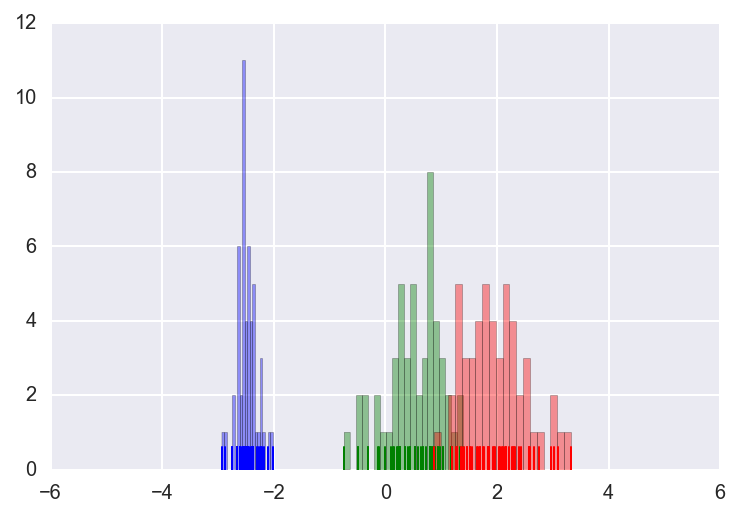

In [33]:
# chage to 1-level
X1 = PCA(1).fit_transform(X)
sns.distplot(X1[iris.target==0], color="b", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==1], color="g", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==2], color="r", bins=20, rug=True, kde=False)
plt.xlim(-6, 6)
plt.show()

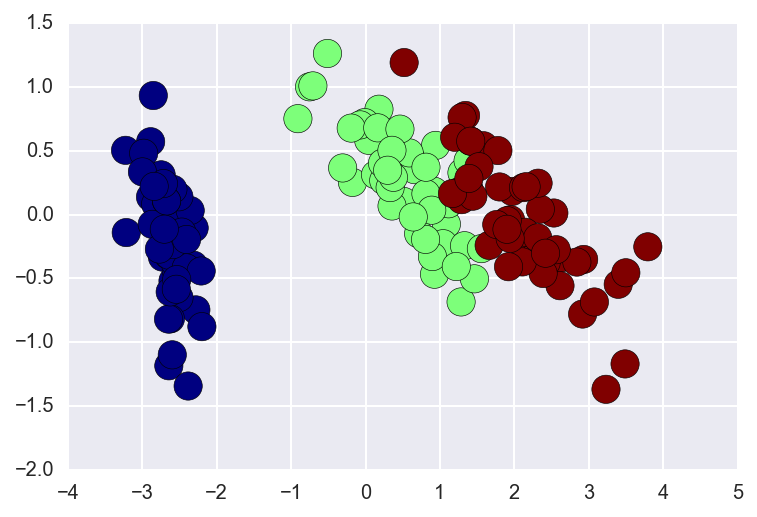

In [34]:
# chage to 2-level from 4-level
X3 = PCA(2).fit_transform(iris.data)
plt.scatter(X3[:, 0], X3[:, 1], c=iris.target, s=200, cmap=plt.cm.jet);

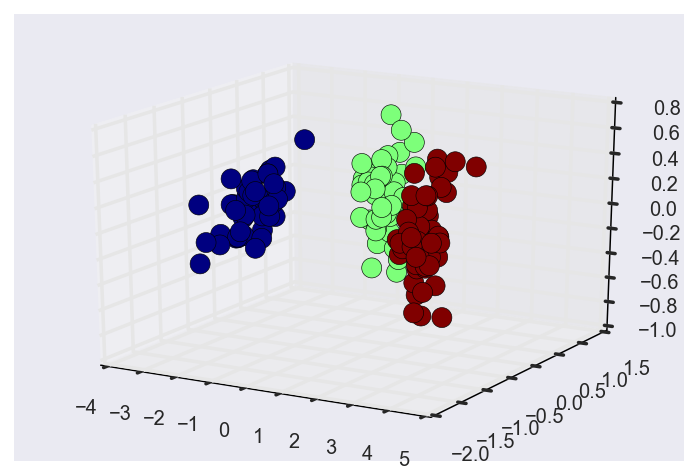

In [35]:
# chage to 3-level from 4-level
X4 = PCA(3).fit_transform(iris.data)
from mpl_toolkits.mplot3d import Axes3D

def plot_pca(azim):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(X4[:,0], X4[:,1], X4[:,2], c=iris.target, s=100, cmap=plt.cm.jet, alpha=1);
    ax.view_init(20, azim)

plot_pca(-60)